##### Exercise 1 - train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [38]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [39]:
t = {}

for w in words[:5]:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        trigram = (ch1+ch2, ch3) # 2 chars in -> 1 char out
        t[trigram] = t.get(trigram, 0) + 1

In [40]:
sorted(t.items(), key = lambda kv: -kv[1])

[(('ia', '<E>'), 2),
 (('<S>e', 'm'), 1),
 (('em', 'm'), 1),
 (('mm', 'a'), 1),
 (('ma', '<E>'), 1),
 (('<S>o', 'l'), 1),
 (('ol', 'i'), 1),
 (('li', 'v'), 1),
 (('iv', 'i'), 1),
 (('vi', 'a'), 1),
 (('<S>a', 'v'), 1),
 (('av', 'a'), 1),
 (('va', '<E>'), 1),
 (('<S>i', 's'), 1),
 (('is', 'a'), 1),
 (('sa', 'b'), 1),
 (('ab', 'e'), 1),
 (('be', 'l'), 1),
 (('el', 'l'), 1),
 (('ll', 'a'), 1),
 (('la', '<E>'), 1),
 (('<S>s', 'o'), 1),
 (('so', 'p'), 1),
 (('op', 'h'), 1),
 (('ph', 'i'), 1),
 (('hi', 'a'), 1)]

In [41]:
import torch

In [42]:
N = torch.zeros((27, 27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [43]:
for w in words:
    chs = ['.','.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        N[ix1, ix2, ix3] += 1

# for i in range(27):
#     for j in range(27):
#         for k in range(27):
#             print(itos[i] + itos[j], itos[k], N[i, j, k].item())  

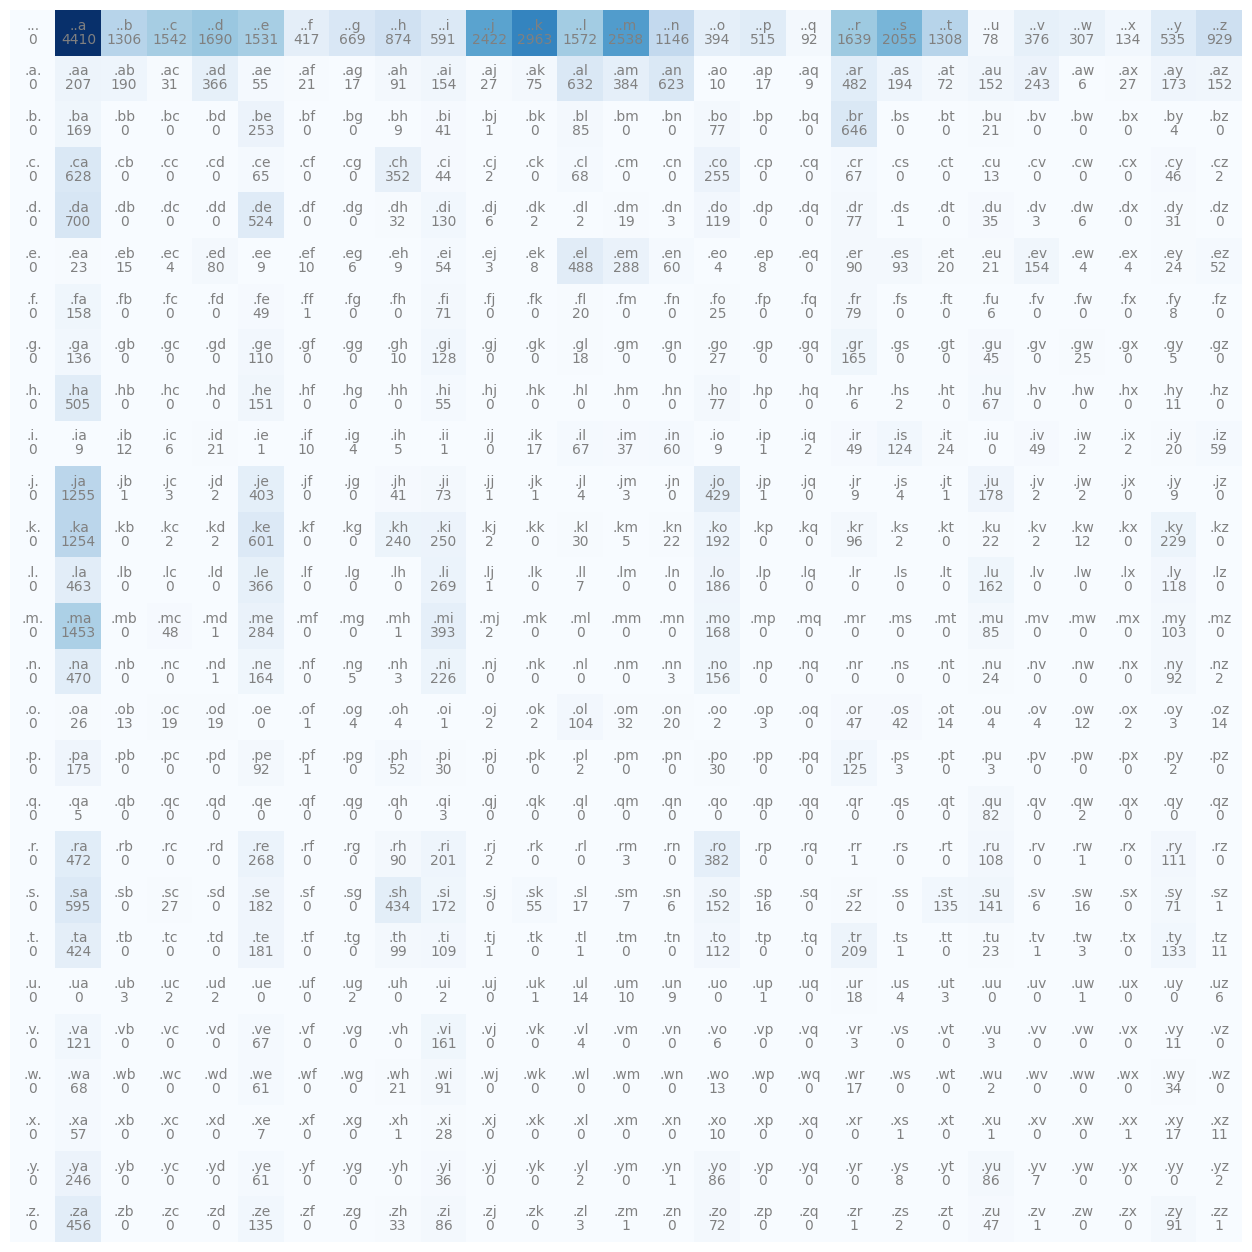

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(1):
    plt.figure(figsize=(16, 16))
    plt.imshow(N[i], cmap='Blues')
    for j in range(27):
        for k in range(27):
            chstr = itos[i] + itos[j] + itos[k]
            plt.text(k, j, chstr, ha='center', va='bottom', color='gray')
            plt.text(k, j, N[i, j, k].item(), ha='center', va='top', color='gray')
    plt.axis('off')

In [45]:
p = N[0, 0].float() # = N[0].float() in bigram, .. of tri = . in bi
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [46]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [47]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [48]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [49]:
p.shape

torch.Size([3])

In [50]:
P = (N+1).float() # model smoothing
P = P / P.sum(1, keepdim=True) # keepdim=False squezes the dimension out

In [51]:
P[5, 13, 13], P[0, 0, 5], P[0, 0, 0] # emm, ..e, ...

(tensor(0.2658), tensor(0.2713), tensor(0.0370))

In [52]:
# Trigram with manual normalization


for i in range(10):
    out = []
    ix1 = 0; ix2 = 0
    while True:
        p = P[ix1, ix2]
        ix1 = ix2
        ix2 = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))


huchyquambhiruwawqzvqvbqfzjwooufjdotvah.
moffrejqpvdpzg.
zygfgusgzbggyjpvpjkjfmfqedxkqxjwjwklumkfcvbgxrhzilludshwoppbmjthippwpvwcuhawtkxpxqlbgpseyuhyayilylislyxxx.
m.
dqkfknoxvhbcfgfqqqzgbfbgwenazrwkxwe.
josetsdowyelwfvpszoizwsxzgjksgccottleysjytzajwgoqcurpjvjbgh.
shurkullynkobbzubygpddomehjhogydvftpjwa.
zedusfkckhanciejqhsframrrfmkckfcxkjfe.
xahdxgjzvtwzbqcxfwdmejvodropvfzwxmppckqqaffrelymunnadhusfmvpsxvhxsharthauxynnailynexqcffidonovffxushetbhjqoppepqwceoppemujbggwzhfqohlczgfkobykfcquarxzawwmxjfjdtghgcfwawwookhudqfpdhyjgivjgfvxkqqueenzophmjff.
denzfuxvpfxoxpvxiseydgqvpgqzzqjndeverlystoquadwydfjbjzorikxvyaspzgtchjqp.


In [53]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.','.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        ix3 = stoi[ch3]
        prob = P[ix1, ix2, ix3]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood # negative log likelihood
print(f'{nll=}')
print(f'{nll/n=}') # loss

log_likelihood=tensor(-425573.2188)
nll=tensor(425573.2188)
nll/n=tensor(1.8654)


In [54]:
# Neural nets approach to trigram

xs, ys, zs = [], [], []

for w in words[:1]:
    chs = ['.','.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]; xs.append(ix1)
        ix2 = stoi[ch2]; ys.append(ix2)
        ix3 = stoi[ch3]; zs.append(ix3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
zs = torch.tensor(zs)

In [55]:
xs, ys, zs

(tensor([ 0,  0,  5, 13, 13]),
 tensor([ 0,  5, 13, 13,  1]),
 tensor([ 5, 13, 13,  1,  0]))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.,

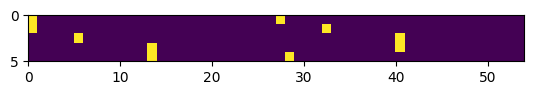

In [56]:
import torch.nn.functional as F
xenc1 = F.one_hot(xs, num_classes=27).float() # one-hot encoding 
xenc2 = F.one_hot(ys, num_classes=27).float()
xenc = torch.cat([xenc1, xenc2], dim=1)
plt.imshow(xenc, extent=[0, 54, 5, 0])
xenc

In [57]:
W = torch.randn((54, 27))
xenc @ W

tensor([[ 1.1233e+00,  1.1665e+00,  5.3810e-01,  1.8636e-01, -1.2719e+00,
         -2.1402e+00, -1.5987e-01,  8.2913e-01, -2.3920e+00, -2.1537e+00,
          3.0840e+00, -1.5557e+00,  1.1492e+00,  1.0034e+00, -4.2751e+00,
          1.2366e+00, -1.6883e+00, -1.8838e+00,  1.9390e-01, -5.7090e-02,
          5.3464e-01, -3.0325e-01,  3.6741e-01,  2.3167e+00, -3.2717e-01,
         -1.6875e+00,  7.1539e-01],
        [ 1.1375e+00,  1.5436e+00,  4.4081e+00, -1.9080e-01,  5.7373e-01,
         -1.3409e+00,  1.5720e+00,  2.5956e+00, -6.3683e-01, -1.2599e+00,
          1.0567e-01, -3.5984e+00,  1.2266e+00,  4.6153e-01, -3.7175e+00,
         -3.7253e-02, -1.5544e+00, -2.7281e+00,  7.1045e-01, -1.4785e+00,
          5.7617e-01,  8.7697e-02,  2.2329e+00,  1.3810e+00, -8.2205e-01,
          1.3143e-01,  3.3458e-01],
        [ 4.2029e-01, -1.8408e+00, -2.2647e-01, -1.1350e+00, -1.3808e+00,
          1.5208e+00,  2.0259e-01,  6.4455e-01, -1.6260e+00, -1.4888e+00,
         -1.0711e+00, -3.6611e-01, -7.37

In [58]:
logits = xenc @ W 

# softmax - normalization technique
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)

probs

tensor([[4.8177e-02, 5.0305e-02, 2.6834e-02, 1.8877e-02, 4.3913e-03, 1.8430e-03,
         1.3353e-02, 3.5899e-02, 1.4327e-03, 1.8182e-03, 3.4225e-01, 3.3065e-03,
         4.9440e-02, 4.2732e-02, 2.1794e-04, 5.3959e-02, 2.8957e-03, 2.3817e-03,
         1.9020e-02, 1.4798e-02, 2.6742e-02, 1.1569e-02, 2.2624e-02, 1.5890e-01,
         1.1296e-02, 2.8982e-03, 3.2040e-02],
        [2.2179e-02, 3.3291e-02, 5.8391e-01, 5.8758e-03, 1.2621e-02, 1.8604e-03,
         3.4249e-02, 9.5321e-02, 3.7615e-03, 2.0173e-03, 7.9036e-03, 1.9460e-04,
         2.4246e-02, 1.1281e-02, 1.7276e-04, 6.8509e-03, 1.5026e-03, 4.6467e-04,
         1.4470e-02, 1.6212e-03, 1.2652e-02, 7.7627e-03, 6.6322e-02, 2.8293e-02,
         3.1255e-03, 8.1098e-03, 9.9366e-03],
        [3.9044e-02, 4.0698e-03, 2.0449e-02, 8.2433e-03, 6.4470e-03, 1.1736e-01,
         3.1406e-02, 4.8860e-02, 5.0450e-03, 5.7871e-03, 8.7877e-03, 1.7784e-02,
         1.2262e-02, 4.0983e-02, 2.0550e-02, 3.7734e-02, 3.4904e-01, 7.5940e-03,
         4.6284e-

In [59]:
probs[0].sum()

tensor(1.0000)

In [60]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th trigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # input character index
  z = zs[i].item() # label character index
  print('--------')
  print(f'trigram example {i+1}: {itos[x]}{itos[y]}:{itos[z]} (indexes {x},{y},{z})')
  print('inputs to the neural net:', x, ' ', y)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', z)
  p = probs[i]
  print('probability assigned by the net to the the correct character:', p[z].item())
  logp = torch.log(p[z])
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
trigram example 1: ..:e (indexes 0,0,5)
inputs to the neural net: 0   0
output probabilities from the neural net: tensor([4.8177e-02, 5.0305e-02, 2.6834e-02, 1.8877e-02, 4.3913e-03, 1.8430e-03,
        1.3353e-02, 3.5899e-02, 1.4327e-03, 1.8182e-03, 3.4225e-01, 3.3065e-03,
        4.9440e-02, 4.2732e-02, 2.1794e-04, 5.3959e-02, 2.8957e-03, 2.3817e-03,
        1.9020e-02, 1.4798e-02, 2.6742e-02, 1.1569e-02, 2.2624e-02, 1.5890e-01,
        1.1296e-02, 2.8982e-03, 3.2040e-02])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.0018430144991725683
log likelihood: -6.296352863311768
negative log likelihood: 6.296352863311768
--------
trigram example 2: .e:m (indexes 0,5,13)
inputs to the neural net: 0   5
output probabilities from the neural net: tensor([2.2179e-02, 3.3291e-02, 5.8391e-01, 5.8758e-03, 1.2621e-02, 1.8604e-03,
        3.4249e-02, 9.5321e-02, 3.7615e-03, 2.0173e-03, 7.9036e-03, 1.9460e-04,
        2.4246e-02, 1.1281e-02, 1

In [61]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

In [62]:
# forward
xenc1 = F.one_hot(xs, num_classes=27).float()
xenc2 = F.one_hot(ys, num_classes=27).float()
xenc = torch.cat([xenc1, xenc2], dim=1)
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), zs].log().mean()
loss.item()

4.4693284034729

In [63]:
W.grad = None # grad = 0
loss.backward()

In [64]:
W.data += -0.1 * W.grad

In [65]:
xs, zs = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
        ix1 = stoi[ch1]; 
        ix2 = stoi[ch2];
        xs.append([ix1,ix2])
        ix3 = stoi[ch3]; zs.append(ix3)

xs = torch.tensor(xs)
zs = torch.tensor(zs)

num = xs.nelement()
print('number of examples: ', num)

# nets init
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54, 27), generator=g, requires_grad=True)

number of examples:  392226


In [66]:
# gradient descent
for k in range(10):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc.view(-1, 54) @ W
  counts = logits.exp()
  probs = counts / counts.sum(1, keepdims=True)
  loss = -probs[torch.arange(zs.shape[0]), zs].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None
  loss.backward()
  
  W.data += -50 * W.grad

4.195971488952637
3.3653788566589355
3.049534320831299
2.8784797191619873
2.7739577293395996
2.701239585876465
2.6454999446868896
2.601283550262451
2.5652341842651367
2.535409688949585


In [67]:
for i in range(5):
    out = []
    ix1 = 0; ix2 = 0
    while True:
        # p = P[ix1, ix2]
        xenc = F.one_hot(torch.tensor([ix1, ix2]), num_classes=27).float()
        logits = xenc.view(-1, 54) @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix1 = ix2
        ix2 = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix2])
        if ix2 == 0:
            break
    print(''.join(out))

oa.
oa.
nvis.
aerriejarol.
ael.


##### Exercise 2 - split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [68]:
train_ratio = 0.8
dev_ratio = 0.1
test_ratio = 0.1

num = xs.shape[0]

n_train = int(train_ratio * num)
n_dev = int(dev_ratio * num) + 1
n_test = int(test_ratio * num) + 1

num - (n_train + n_dev + n_test)

-1

In [69]:
# splitting
xs_train, zs_train = xs[:n_train], zs[:n_train]
xs_dev, zs_dev = xs[n_train:n_train+n_dev], zs[n_train:n_train+n_dev]
xs_test, zs_test = xs[n_train+n_dev:], zs[n_train+n_dev:]

##### Exercise 3 - use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

In [70]:
xenc_train = F.one_hot(xs_train, num_classes=27).float()

xenc_dev = F.one_hot(xs_dev, num_classes=27).float()

xenc_test = F.one_hot(xs_test, num_classes=27).float()


In [71]:
lambda_candidates = reversed(sorted([0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00025, 0.0025, 0.025, 0.25]))


In [72]:
# Train Loss vs Dev Loss

for LAMBDA in lambda_candidates:
    print(f"------Testing lambda {LAMBDA}------")

    # reset weights for each lambda
    W = torch.randn((54, 27), requires_grad=True)

    # storing losses for each L2 lambda
    loss_train = []
    loss_dev = []
    
    for k in range(100): 
        logits_train = xenc_train.view(-1, 54) @ W        
        loss_t = F.cross_entropy(logits_train, zs_train) + LAMBDA * (W**2).mean() 
        
        with torch.no_grad():
            logits_dev = xenc_dev.view(-1, 54) @ W
            loss_d = F.cross_entropy(logits_dev, zs_dev) 

        W.grad = None
        loss_t.backward()
        W.data += -50 * W.grad 

        loss_train.append(loss_t.item())
        loss_dev.append(loss_d.item())

    print("mean of training loss =", f'{sum(loss_train)/len(loss_train)}')
    print("mean of dev loss =", f'{sum(loss_dev)/len(loss_dev)}')
    print('------------'*3)

------Testing lambda 0.5------
mean of training loss = 2.52067969083786
mean of dev loss = 2.5613158249855044
------------------------------------
------Testing lambda 0.25------
mean of training loss = 2.4487189745903013
mean of dev loss = 2.5469082403182983
------------------------------------
------Testing lambda 0.1------
mean of training loss = 2.391834421157837
mean of dev loss = 2.546790592670441
------------------------------------
------Testing lambda 0.05------
mean of training loss = 2.3703828716278075
mean of dev loss = 2.5498000717163087
------------------------------------
------Testing lambda 0.025------
mean of training loss = 2.3471178436279296
mean of dev loss = 2.549313812255859
------------------------------------
------Testing lambda 0.01------
mean of training loss = 2.3447921562194822
mean of dev loss = 2.563476114273071
------------------------------------
------Testing lambda 0.005------
mean of training loss = 2.331388227939606
mean of dev loss = 2.55187505483

In [73]:
with torch.no_grad():
    logits_test = xenc_test.view(-1, 54) @ W
    test_loss = F.cross_entropy(logits_test, zs_test)

In [74]:
print("\n=== FINAL EVALUATION ===")
print(f"Test Loss:  {test_loss.item():.4f}")


=== FINAL EVALUATION ===
Test Loss:  2.4510


##### Exercise 4 - we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

In [76]:
xs_train[0]

tensor([0, 5])

In [81]:
xenc = F.one_hot(xs, num_classes=27).float()
xenc_pre = torch.zeros(*xs.shape, 27)

In [82]:
torch.allclose(xenc_pre, xenc)

False

In [83]:
xenc_pre[:,0,:].shape, xs[:,0].shape, xenc_pre.shape, xs.shape,

(torch.Size([196113, 27]),
 torch.Size([196113]),
 torch.Size([196113, 2, 27]),
 torch.Size([196113, 2]))

In [84]:
xenc_pre[torch.arange(196113), 0, xs[:,0]] = 1
xenc_pre

tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [85]:
xenc_pre[torch.arange(196113), 1, xs[:,1]] = 1

In [86]:
xenc_pre[5]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [87]:
torch.allclose(xenc_pre, xenc)

True